### IMPORTING LIBRARIES

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import copy,math
import matplotlib.pyplot as plt

In [76]:
laptop=pd.read_csv('laptopPrice.csv')

In [77]:
laptop.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

### DATA CLEANING

In [78]:
laptop["ram_gb"] = laptop["ram_gb"].str.replace('GB', '')
laptop["ssd"] = laptop["ssd"].str.replace('GB', '')
laptop["hdd"] = laptop["hdd"].str.replace('GB', '')
laptop["graphic_card_gb"] = laptop["graphic_card_gb"].str.replace('GB', '')

In [79]:
laptopprice=laptop[['brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ssd', 'hdd', 'graphic_card_gb','Price',]]
laptopprice

,brand,processor_name,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,Price
0,ASUS,Core i3,10th,4,0,1024,0,34649
1,Lenovo,Core i3,10th,4,0,1024,0,38999
2,Lenovo,Core i3,10th,4,0,1024,0,39999
3,ASUS,Core i5,10th,8,512,0,2,69990
4,ASUS,Celeron Dual,Not Available,4,0,512,0,26990
...,...,...,...,...,...,...,...,...
813,ASUS,Ryzen 9,Not Available,4,1024,0,0,135990
814,ASUS,Ryzen 9,Not Available,4,1024,0,0,144990
815,ASUS,Ryzen 9,Not Available,4,1024,0,4,149990
816,ASUS,Ryzen 9,Not Available,4,1024,0,4,142990


### BONUS TASK(DATA ANALYSIS)

In [80]:
laptopprice.describe()

,Price
count,818.000000
mean,77030.700489
std,45090.184043
min,16990.000000
25%,46840.000000
50%,64990.000000
75%,89918.000000
max,441990.000000


## HISTOGRAMs

<Axes: xlabel='brand', ylabel='count'>

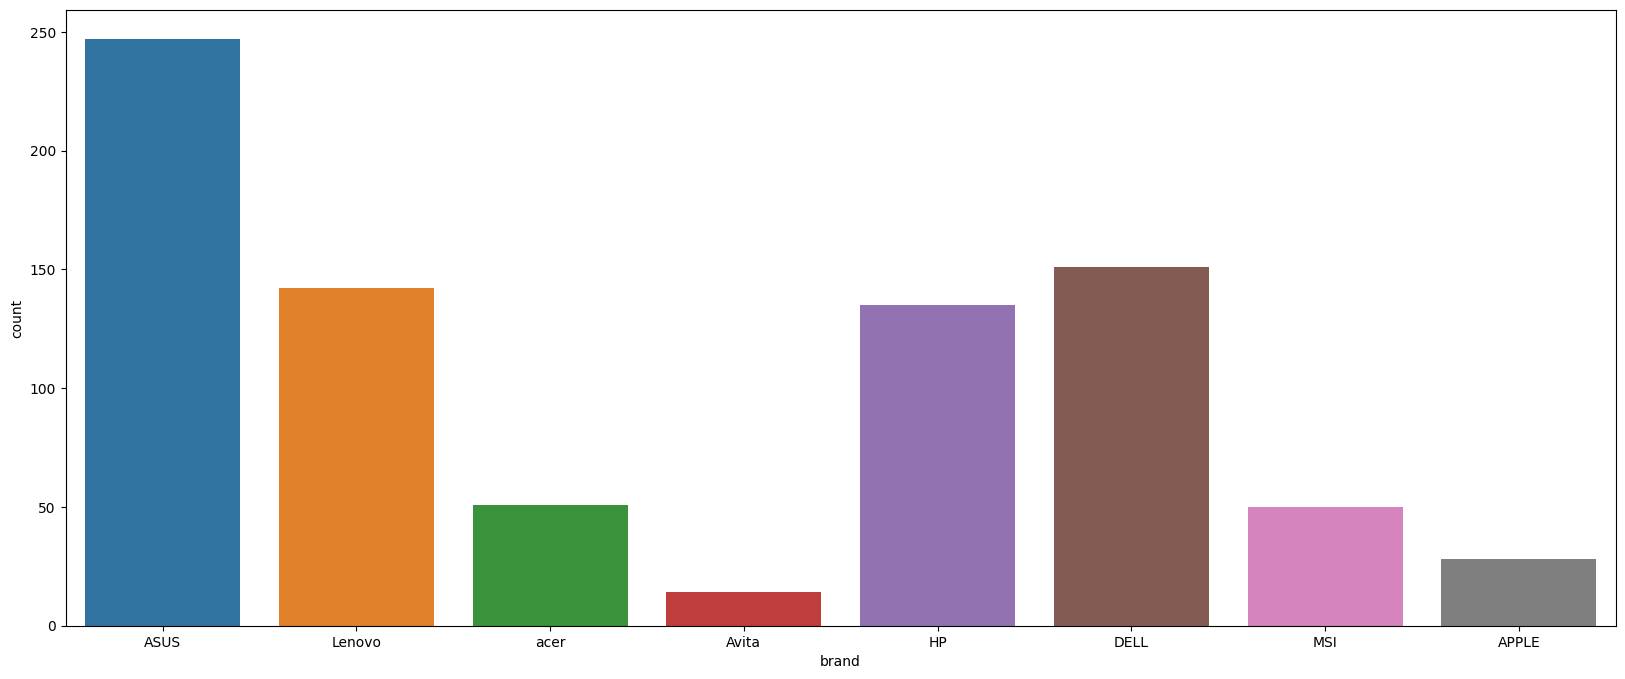

In [81]:
laptopprice['brand'].value_counts()
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sb.countplot(x="brand", data=laptopprice, ax=ax)

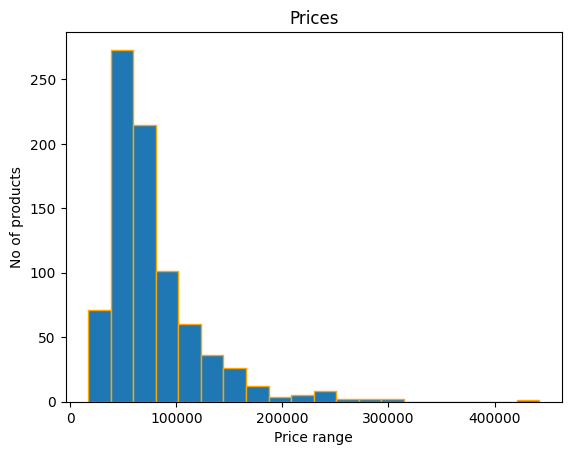

In [103]:
# Histogram of distribution of prices between different price ranges
features = laptopprice.drop( columns = ["Price"])
price = laptopprice["Price"]

plt.hist( price, bins = 20, edgecolor='orange' )
plt.title("Prices")
plt.xlabel("Price range")
plt.ylabel("No of products")
plt.show()

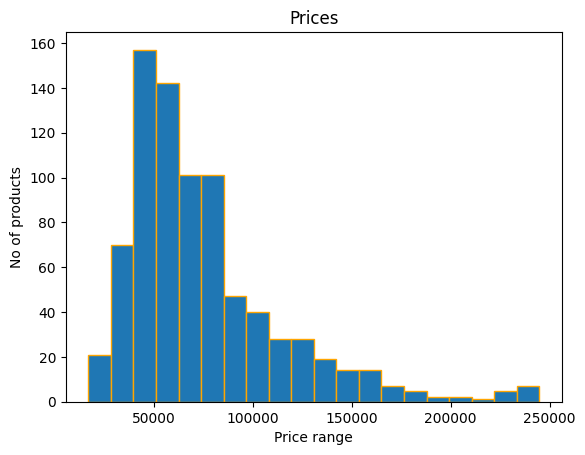

In [105]:
laptopprice= laptopprice[laptopprice['Price'] <= 250000]
features = laptopprice.drop( columns = ["Price"])
price = laptopprice["Price"]

plt.hist( price , bins = 20 , edgecolor='orange' )
plt.title("Prices")
plt.xlabel("Price range")
plt.ylabel("No of products")
plt.show()

## Scatterplots

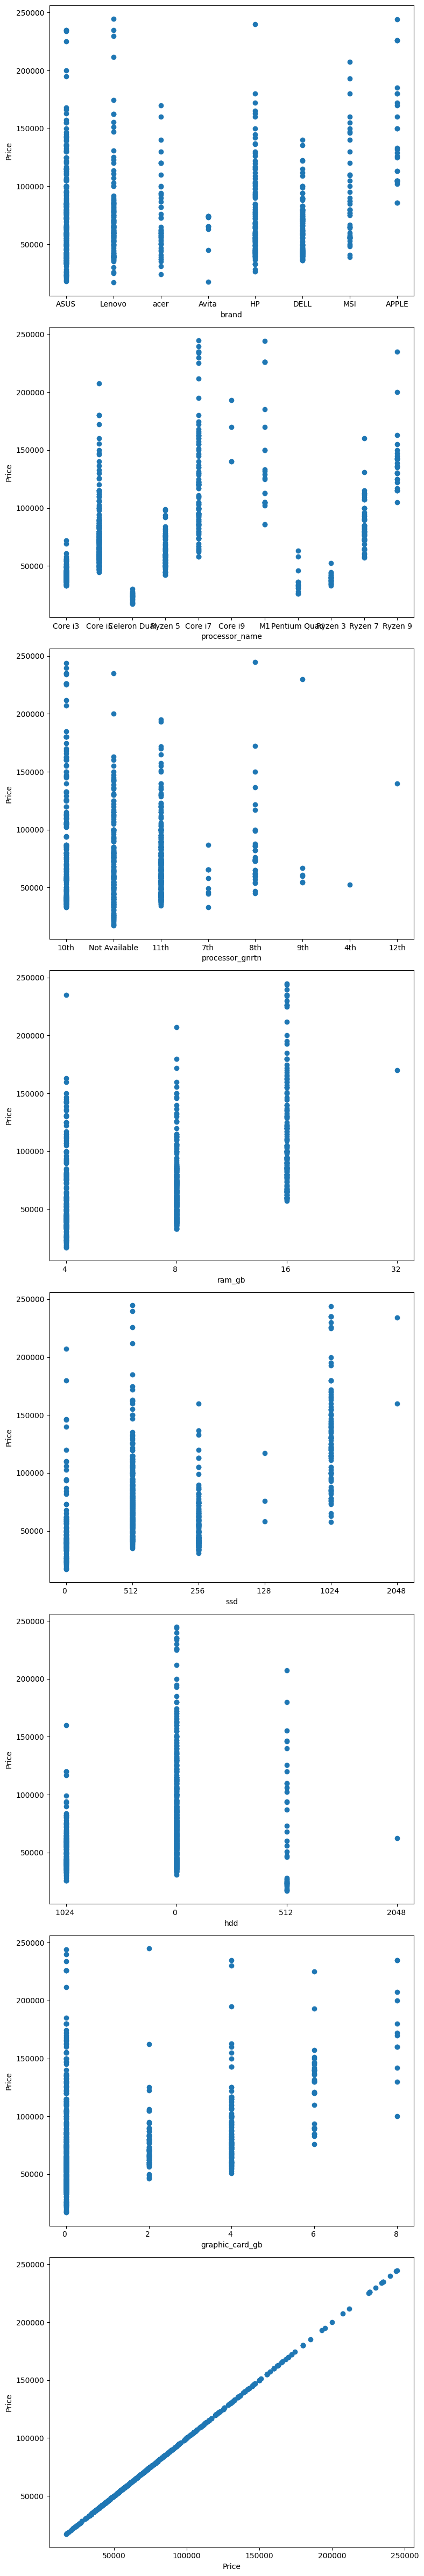

In [107]:
features_list = laptopprice.columns
prices_column_index = 7

fig, axes = plt.subplots(nrows=len(features_list) , figsize=(8, 6 * len(features_list)))

for i, feature in enumerate(features_list):
    axes[i].scatter(laptopprice[feature], laptopprice.iloc[:, prices_column_index])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(laptopprice.columns[prices_column_index])

plt.tight_layout()
plt.show()

### ONE HOT ENCODING (In order to train the model to use features)

In [108]:
latop=pd.get_dummies(laptopprice)
latop

,Price,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,processor_name_Celeron Dual,...,ssd_512,hdd_0,hdd_1024,hdd_2048,hdd_512,graphic_card_gb_0,graphic_card_gb_2,graphic_card_gb_4,graphic_card_gb_6,graphic_card_gb_8
0,34649,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38999,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,39999,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,69990,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4,26990,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,135990,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
814,144990,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
815,149990,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
816,142990,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [109]:
latop.columns

Index(['Price', 'brand_APPLE', 'brand_ASUS', 'brand_Avita', 'brand_DELL',
       'brand_HP', 'brand_Lenovo', 'brand_MSI', 'brand_acer',
       'processor_name_Celeron Dual', 'processor_name_Core i3',
       'processor_name_Core i5', 'processor_name_Core i7',
       'processor_name_Core i9', 'processor_name_M1',
       'processor_name_Pentium Quad', 'processor_name_Ryzen 3',
       'processor_name_Ryzen 5', 'processor_name_Ryzen 7',
       'processor_name_Ryzen 9', 'processor_gnrtn_10th',
       'processor_gnrtn_11th', 'processor_gnrtn_12th', 'processor_gnrtn_4th',
       'processor_gnrtn_7th', 'processor_gnrtn_8th', 'processor_gnrtn_9th',
       'processor_gnrtn_Not Available', 'ram_gb_16 ', 'ram_gb_32 ',
       'ram_gb_4 ', 'ram_gb_8 ', 'ssd_0 ', 'ssd_1024 ', 'ssd_128 ',
       'ssd_2048 ', 'ssd_256 ', 'ssd_512 ', 'hdd_0 ', 'hdd_1024 ', 'hdd_2048 ',
       'hdd_512 ', 'graphic_card_gb_0 ', 'graphic_card_gb_2 ',
       'graphic_card_gb_4 ', 'graphic_card_gb_6 ', 'graphic_card_gb_8 '],


Converting to numpy arrays

In [110]:
latop_numpy=latop.values
latop_numpy

array([[ 34649,      0,      1, ...,      0,      0,      0],
       [ 38999,      0,      0, ...,      0,      0,      0],
       [ 39999,      0,      0, ...,      0,      0,      0],
       ...,
       [149990,      0,      1, ...,      1,      0,      0],
       [142990,      0,      1, ...,      1,      0,      0],
       [ 57490,      0,      0, ...,      0,      0,      0]])

In [111]:
x_train=latop_numpy[:,1:47:1]
y_train=latop_numpy[:,0]

### Defining gradient descent from scratch

In [112]:
def predict(x,w,b):
  p=np.dot(x,w)+b
  return p

In [113]:
def computecost(x,y,w,b):
  m=x.shape[0]
  cost=0.0
  for i in range(m):
    f_wb_i=np.dot(x[i],w)+b
    cost=cost+(f_wb_i-y[i])**2
  cost=cost/(2*m)
  return cost

In [114]:
def computegradient(x,y,w,b):
  m,n=x.shape
  dj_dw=np.zeros((n,))
  dj_db=0.
  for i in range(m):
    err=(np.dot(x[i],w)+b)-y[i]
    for j in range(n):
      dj_dw[j]=dj_dw[j]+err*x[i,j]
    dj_db=dj_db+err
  dj_dw=dj_dw/m
  dj_db=dj_db/m

  return dj_db,dj_dw

In [115]:
def gradientdescent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
  J_history=[]
  w=copy.deepcopy(w_in)
  b=b_in
  for i in range(num_iters):
    dj_db,dj_dw=gradient_function(x,y,w,b)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db
    if i<100000:
      J_history.append(cost_function(x,y,w,b))
    if i%math.ceil(num_iters/10)==0:
      print(f"Iteration{i:4d}:Cost{J_history[-1]:8.2f}")
  return w,b,J_history


In [138]:
initial_w=np.zeros(46)
initial_b=0.
iterations=10000
alpha=5.0e-1
w_final,b_final,J_his=gradientdescent(x_train,y_train,initial_w,initial_b,computecost,computegradient,alpha,iterations)

print(f"b,w found by gradient descent:{b_final:0.2f},{w_final}")
m,_=x_train.shape
for i in range(m):
  print(f"predictions:{np.dot(x_train[i],w_final)+b_final:0.2f},target value:{y_train[i]}")

Iteration   0:Cost2538597539.09
Iteration1000:Cost197766724.31
Iteration2000:Cost196663002.63
Iteration3000:Cost196565034.86
Iteration4000:Cost196550286.85
Iteration5000:Cost196546288.23
Iteration6000:Cost196544873.92
Iteration7000:Cost196544337.91
Iteration8000:Cost196544131.53
Iteration9000:Cost196544051.75
b,w found by gradient descent:47229.02,[ 78117.50140901  -1498.96333726 -23466.30710553   2436.08101987
   3452.19074476   1349.1265106   -6531.02285882  -6629.59082557
 -61864.94601831  -8348.71371817  14369.9142328   39285.46728506
  58217.08263851  -5551.80508675 -18761.45156146 -17591.46820556
  -4981.97159958   8700.50105532  43756.4065352    7089.79156353
   -381.97799292   2567.91877901  -2683.21787699   9000.56379697
  15341.22975277   7250.74092654   9043.96660815  21607.67145869
    523.65960631  13700.05027474  11397.63421732 -20246.05947428
  21927.98022383  -4485.61679903  62694.67633633 -11857.59875568
   -804.3659741    1504.23080049   5520.15391123  -3335.60758875


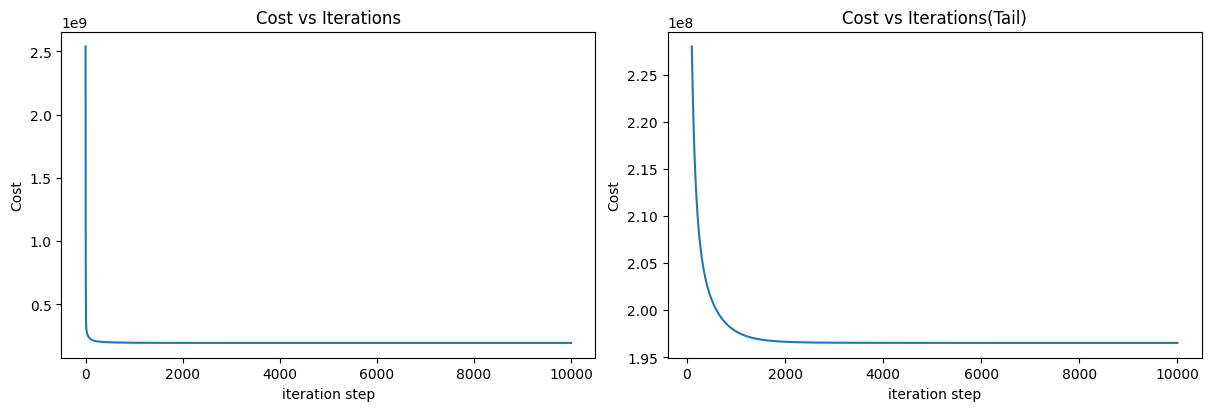

In [117]:
fig,(ax1,ax2)=plt.subplots(1,2,constrained_layout=True,figsize=(12,4))
ax1.plot(J_his)
ax2.plot(100+np.arange(len(J_his[100:])),J_his[100:])
ax1.set_title("Cost vs Iterations");ax2.set_title("Cost vs Iterations(Tail)")
ax1.set_ylabel('Cost');ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step');ax2.set_xlabel('iteration step')
plt.show()

## Z-score normalisation to help in feature scaling(no need here as all values are 0,1 but still.....)


In [93]:
def zscore_normalisation_features(x):
  mu=np.mean(x,axis=0)
  sigma=np.std(x,axis=0)
  x_norm=(x-mu)/sigma
  return(x_norm,mu,sigma)

In [92]:
x_norm,x_mu,x_sigma=zscore_normalisation_features(x_train)
print(f"x_mu={x_mu},\nx_sigma={x_sigma}")
print(f"Peak to Peak range in column in Raw x:{np.ptp(x_train,axis=0)}")
print(f"Peak to Peak range in column in Normalised x:{np.ptp(x_norm,axis=0)}")

x_mu=[0.03422983 0.30195599 0.01711491 0.18459658 0.16503667 0.17359413
 0.06112469 0.06234719 0.02322738 0.200489   0.35452323 0.13447433
 0.00977995 0.02933985 0.01589242 0.03178484 0.1002445  0.06845966
 0.03178484 0.24938875 0.40831296 0.00366748 0.00122249 0.01100244
 0.05012225 0.00733496 0.26894866 0.21638142 0.00244499 0.27139364
 0.50977995 0.15036675 0.13569682 0.00366748 0.00244499 0.2200489
 0.00122249 0.48655257 0.75427873 0.19437653 0.00122249 0.05012225
 0.6992665  0.08190709 0.15647922 0.04523227],
x_sigma=[0.181819   0.45910627 0.12969963 0.38796995 0.37121365 0.37876009
 0.2395589  0.24178506 0.15062494 0.40036628 0.47836859 0.34116123
 0.09840886 0.1687573  0.12505939 0.17542681 0.30032572 0.25253303
 0.17542681 0.43265922 0.4915216  0.06044858 0.0349428  0.10431391
 0.21819718 0.08532972 0.44341321 0.41177725 0.04938633 0.44467869
 0.49990434 0.35743054 0.34246634 0.06044858 0.04938633 0.41427935
 0.0349428  0.49981913 0.43051403 0.39571997 0.0349428  0.21819718
 0.

In [94]:
x_features=['brand','processor name','processor gen','ram(in GB)','ssd(in GB)','hdd(in GB)','graphics card(in GB)']

In [96]:
initial_w=np.zeros(46)
initial_b=0.
iterations=1000
alpha=8.0e-2
w_norm,b_norm,his=gradientdescent(x_norm,y_train,initial_w,initial_b,computecost,computegradient,alpha,iterations)

Iteration   0:Cost3223502105.66
Iteration 100:Cost245408114.12
Iteration 200:Cost240260271.39
Iteration 300:Cost237819326.53
Iteration 400:Cost236391290.75
Iteration 500:Cost235515568.64
Iteration 600:Cost234968988.56
Iteration 700:Cost234625067.83
Iteration 800:Cost234407761.66
Iteration 900:Cost234270124.04


<function matplotlib.pyplot.show(close=None, block=None)>

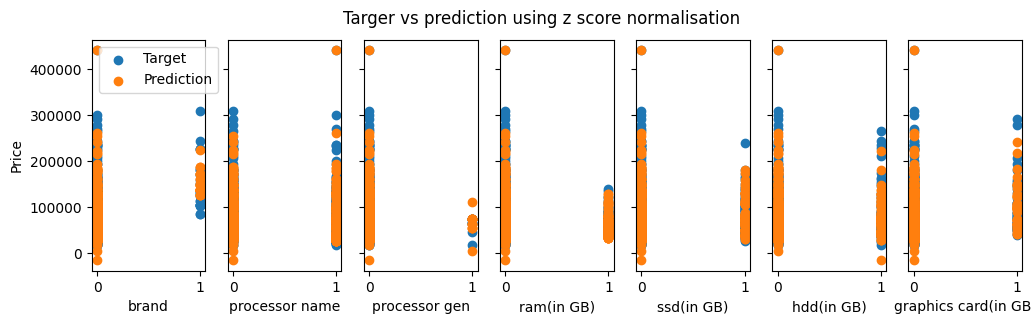

In [98]:
m=x_norm.shape[0]
yp=np.zeros(m)
for i in range(m):
  yp[i]=np.dot(x_norm[i],w_norm)+b_norm

fig,ax=plt.subplots(1,7,figsize=(12,3),sharey=True)
for i in range(len(ax)):
  ax[i].scatter(x_train[:,i],y_train,label='Target')
  ax[i].set_xlabel(x_features[i])
  ax[i].scatter(x_train[:,i],yp,label='Prediction')
ax[0].set_ylabel("Price");ax[0].legend();
fig.suptitle("Targer vs prediction using z score normalisation")
plt.show

## Decision trees algorithm using sci-kit learn

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error, mean_absolute_error, r2_score

In [122]:
features_train, features_test, price_train, price_test = train_test_split(x_train, y_train , test_size=0.2, random_state=42)

In [131]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor_model = DecisionTreeRegressor()
decision_tree_regressor_model.fit( features_train , price_train )

price_predicted = decision_tree_regressor_model.predict( features_test )

price_predicted = np.array( price_predicted )
price_test = np.array( price_test )

for i in range(20):
    print( ( price_predicted[i] , price_test[i] ))

(80800.54545454546, 97990)
(114323.33333333333, 119990)
(79596.0, 76990)
(82840.0, 84990)
(194990.0, 154990)
(136823.33333333334, 142990)
(68090.0, 102551)
(116240.0, 103990)
(60490.0, 59990)
(57990.0, 233990)
(41490.0, 39998)
(69417.5, 71990)
(58656.666666666664, 57990)
(127493.33333333333, 144990)
(63366.0625, 55990)
(53540.0, 58990)
(69994.5, 57990)
(55385.666666666664, 45490)
(65556.0, 65556)
(224990.0, 144690)


###Calculating Errors

In [132]:

print("Mean absolute error is:- " , mean_absolute_error( price_test , price_predicted ))
print("Mean absolute percentage error is:- " , mean_absolute_percentage_error( price_test , price_predicted )*100)
print("Mean square error is:- " , mean_squared_error( price_test , price_predicted ))
print("Root mean square error is:- " , math.sqrt(mean_squared_error( price_test , price_predicted )) )
print("R-squared score is:- " , r2_score( price_test , price_predicted ))

Mean absolute error is:-  18930.085957958196
Mean absolute percentage error is:-  20.551055793668095
Mean square error is:-  1155713857.4963505
Root mean square error is:-  33995.79176157471
R-squared score is:-  0.359515525608869


## Random forest algorithm using sci-kit

In [136]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit( features_train , price_train )

price_predicted = random_forest_regressor_model.predict( features_test )

price_predicted = np.array( price_predicted )
price_test = np.array( price_test )

for i in range(20):
    print( ( price_predicted[i] , price_test[i] ))

(80231.34466963429, 97990)
(134746.69333333333, 119990)
(75436.39412698412, 76990)
(82381.33527561076, 84990)
(149789.0611111111, 154990)
(136644.07936507938, 142990)
(74132.1, 102551)
(117333.62337662338, 103990)
(62547.26132142856, 59990)
(103151.163, 233990)
(43252.00833333333, 39998)
(69182.47683399933, 71990)
(59005.025, 57990)
(128113.21103174608, 144990)
(63470.64521425394, 55990)
(53500.71666666665, 58990)
(70657.3702420635, 57990)
(55219.84572619048, 45490)
(66234.19974358974, 65556)
(207386.51333333337, 144690)


Calculating Errors

In [137]:


print("Mean absolute error is:- " , mean_absolute_error( price_test , price_predicted ))
print("Mean absolute percentage error is:- " , mean_absolute_percentage_error( price_test , price_predicted )*100)
print("Mean square error is:- " , mean_squared_error( price_test , price_predicted ))
print("Root mean square error is:- " , math.sqrt(mean_squared_error( price_test , price_predicted )) )
print("R-squared score is:- " , r2_score( price_test , price_predicted ))

Mean absolute error is:-  16117.662841432273
Mean absolute percentage error is:-  17.502611538553708
Mean square error is:-  825769552.0694863
Root mean square error is:-  28736.20629222804
R-squared score is:-  0.5423671922813345
